In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

## Courtesy sentdex: Link followed below:
https://www.youtube.com/watch?v=wQ8BIBpya2k

In [2]:
mnist=tf.keras.datasets.mnist #it's the keras dataset, which you also have in the ubytes dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = tf.keras.utils.normalize(x_train, axis=1) #Scales the dataset
x_test = tf.keras.utils.normalize(x_test, axis=1) #Scales the dataset

In [3]:
## Model Creation
#Uses two hidden layers. We have an input layer and an output layer as well

model = tf.keras.models.Sequential() #Sequential Model... Most Commonly used
model.add(tf.keras.layers.Flatten(input_shape = (28,28))) #Flattens the image to confirm that it's 2D Used as input layer
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu)) #Used as hidden layer; 128 'neurons' in the layer. Activation function is what makes the neuron function. Relu is standard
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu)) #Used as hidden layer; 128 'neurons' in the layer. Activation function is what makes the neuron function. Relu is standard
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax)) #Output layer, returns probability distribution.

In [4]:
#Define parameters to train the model 
model.compile(
    optimizer = 'adam', #standard go to. You can also used gradien descent. Get familiar with gradient descent
    loss = 'sparse_categorical_crossentropy', #Degree of error; minimize loss
    metrics=['accuracy']
)

In [5]:
#Train the model
model.fit(x_train, y_train, epochs = 10);
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2654 - accuracy: 0.9229
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1092 - accuracy: 0.9667
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0741 - accuracy: 0.9769
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0559 - accuracy: 0.9818
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0429 - accuracy: 0.9855
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0309 - accuracy: 0.9897
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0259 - accuracy: 0.9913
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0222 - accuracy: 0.9924
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0187 - accuracy: 0.9935
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.1170 

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: num_reader.model\assets
7


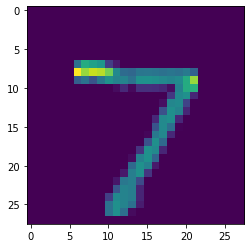

In [6]:
import numpy as np
#Save the model
model.save('num_reader.model')

#load model
new_model = tf.keras.models.load_model('num_reader.model')

#To make a prediction, data has to be a LIST. 
predictions = new_model.predict([x_test])
print(np.argmax(predictions[0]))
plt.imshow(x_test[0])
plt.show()

# Personal Testing with self created images

#### Created my own image to see if the current model detects my digit
#### Remember that the testing images are in a numpy array, not a list. 

In [7]:
eight = plt.imread('../images/eight_2.tiff')
eight = eight[:,:,0]
arr = []; 
arr.append(eight); #Add the images to the list
arr=np.asarray(arr) #Convert it to be an array of arrays, not a list. 
print(np.shape(arr))

(1, 28, 28)


8


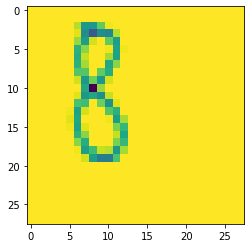

In [8]:
eight_predic = new_model.predict([arr])
print(np.argmax(eight_predic[0]))
plt.imshow(arr[0])
plt.show()